# Importing Necessary Frameworks

In [1]:
import numpy as np    # Importing the NumPy library and assigning it an alias 'np'
import pandas as pd   # Importing the Pandas library and assigning it an alias 'pd'
import matplotlib.pyplot as plt   # Importing the Matplotlib library and assigning it an alias 'plt'

In [2]:
# Import the HTML class from the IPython.display module
from IPython.display import HTML

# Define a function called pretty_print_df that takes in a pandas value_counts_ object as an input parameter
def pretty_print_df(value_counts_): 
  "Quick function to display value counts more nicely"
  
  # Convert the input value_counts_ object into a pandas DataFrame using the DataFrame() constructor
  # and pass it to the to_html() method to create an HTML table as a string
  html_table_string = pd.DataFrame(value_counts_).to_html()
  
  # Pass the HTML table string to the HTML class to create an HTML object
  html_object = HTML(html_table_string)
  
  # Display the HTML object in the notebook using the display() function
  display(html_object)


# Loading the Dataset

In [3]:
df = pd.read_csv("../DataSet/OPTION2_joined_coursework_dataset_banking_final (1).csv")

# Exploratory Data Analysis (EDA) and Data Preprocessing

In [4]:
# Display the first few rows of a Pandas DataFrame
df.head()

text  \
0         Can I automatically top-up when traveling?   
1  What kind of fiat currency can I used for hold...   
2  I did not get the item I ordered.  How should ...   
3                Freeze my account it's been hacked.   
4  is there a reason that my payment didnt go thr...   

                      label   query_index  
0  top_up_queries_or_issues  526cd7f17526  
1                     other  f3cf7343067e  
2                     other  9a19501c3a3c  
3     needs_troubleshooting  d76b07db8cf8  
4                     other  bd95ba09a18d

In [5]:
# Display the shape of a Pandas DataFrame
df.shape

(14195, 3)

In [6]:
# Display the column labels of a Pandas DataFrame
df.columns

Index(['text', 'label', 'query_index'], dtype='object')

In [7]:
# Check if there are any duplicated rows in a Pandas DataFrame
df.duplicated().any()

True

In [8]:
# Remove duplicated rows from a Pandas DataFrame
df = df.drop_duplicates()

In [9]:
df.shape

(13672, 3)

In [10]:
df['label'].value_counts()

other                       4814
needs_troubleshooting       4158
card_queries_or_issues      2496
top_up_queries_or_issues    1633
Other                         21
Card_queries_or_issues        11
Top_up_queries_or_issues      11
Needs_troubleshooting          7
Name: label, dtype: int64

In [11]:
# Convert the values in a Pandas DataFrame column to lowercase
df['label'] = df['label'].str.lower()

In [12]:
df['label'].value_counts()

other                       4835
needs_troubleshooting       4165
card_queries_or_issues      2507
top_up_queries_or_issues    1644
Name: label, dtype: int64

In [13]:
WorkingData = df.copy()

In [14]:
WorkingData.isnull().sum()

text             0
label          521
query_index      0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer 

In [16]:
categorical_columns= ['label']

## 1. Imputer
imptr_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

## 2. Fit the imputer object to the feature matrix (only for categorical features)
imptr_cat = imptr_cat.fit(WorkingData[categorical_columns])

## 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
WorkingData[categorical_columns] = imptr_cat.transform(WorkingData[categorical_columns])  

In [17]:
WorkingData.isnull().sum()

text           0
label          0
query_index    0
dtype: int64

In [18]:
WorkingData['label'].value_counts()

other                       5356
needs_troubleshooting       4165
card_queries_or_issues      2507
top_up_queries_or_issues    1644
Name: label, dtype: int64

Categories and Number of Occurrences for 'label':


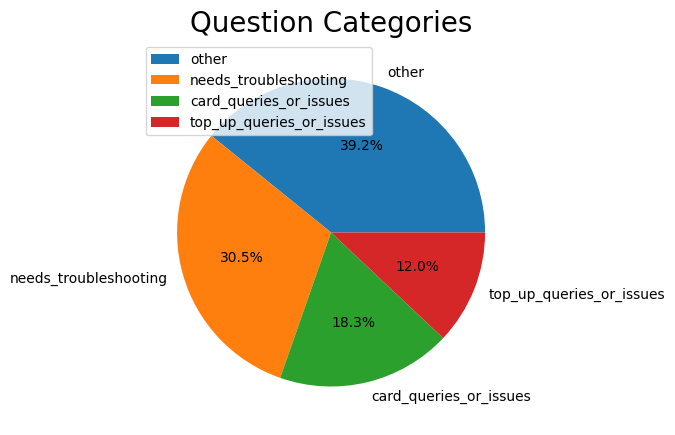

In [19]:
# Define a list of categorical columns
categorical_columns = ['label']

# Iterate over each categorical column
for col in categorical_columns:
    # Display the categories and number of occurrences in the column
    print(f"Categories and Number of Occurrences for '{col}':")
    pretty_print_df(WorkingData[col].value_counts())
    print()
    
    # Create a pie chart to visualize the distribution of values in the column
    plt.figure(figsize=(5, 5))
    values = WorkingData[col].value_counts()
    labels = values.index.tolist()
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title('Question Categories', fontsize=20)
    plt.legend(loc=2)
    plt.show()

In [20]:
# Remove a column from a Pandas DataFrame
del WorkingData['query_index']


In [21]:
WorkingData.shape

(13672, 2)

<AxesSubplot: title={'center': 'Count of number of labels'}>

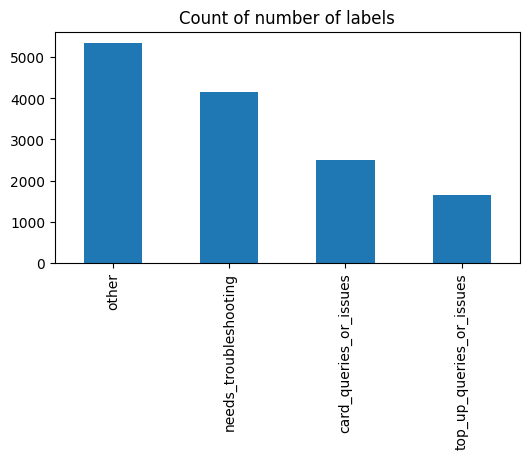

In [22]:
WorkingData['label'].value_counts().plot(kind='bar', title="Count of number of labels", figsize = (6,3))

### Label Encoding for Target Axis

In [23]:
from sklearn import preprocessing

In [24]:
WorkingData_2 = WorkingData.copy() 

In [25]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
WorkingData_2['label']= label_encoder.fit_transform(WorkingData_2['label'])

In [26]:
WorkingData_2['label'].unique()

array([3, 2, 1, 0])

In [27]:
WorkingData['label'].value_counts()

other                       5356
needs_troubleshooting       4165
card_queries_or_issues      2507
top_up_queries_or_issues    1644
Name: label, dtype: int64

In [28]:
WorkingData_2['label'].value_counts()

2    5356
1    4165
0    2507
3    1644
Name: label, dtype: int64

other = 2 <br>
needs_troubleshooting = 1<br>
card_queries_or_issues = 0<br>
top_up_queries_or_issues = 3

In [29]:
WorkingData_2.head()

text  label
0         Can I automatically top-up when traveling?      3
1  What kind of fiat currency can I used for hold...      2
2  I did not get the item I ordered.  How should ...      2
3                Freeze my account it's been hacked.      1
4  is there a reason that my payment didnt go thr...      2

In [30]:
WorkingData_2.shape

(13672, 2)

# Data Cleaning in Text Column

In [31]:
import re ## Regular Expression
import nltk ## Natural Language Took Kit

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabbo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Import a list of stopwords from the NLTK library
from nltk.corpus import stopwords

In [34]:
# Get the list of English stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
sw = set(stopwords.words('english'))

In [36]:
# Import the Porter stemming algorithm from the NLTK library
from nltk.stem.porter import PorterStemmer

# Create a new instance of the Porter stemming algorithm
ps = PorterStemmer()

In [37]:
WorkingData_2["text"][10000]

"I got mugged yesterday and they took everything. I can't use the app, so I need some help."

In [38]:
# Import the Porter stemming algorithm from the NLTK library
from nltk.stem.porter import PorterStemmer

# Create a new instance of the Porter stemming algorithm
ps = PorterStemmer()

# Define a function to clean a sample of text
def clean_text(sample):
  # Convert the text to lowercase
  sample = sample.lower()

  # Remove non-alphabetic characters and replace with spaces
  sample = re.sub("[^a-zA-Z]+"," ", sample)

  # Split the text into individual words
  sample = sample.split()

  # Apply stemming to each word and remove stopwords
  sample = [ps.stem(s) for s in sample if s not in sw]

  # Join the stemmed words back into a single string
  sample = " ".join(sample)

  # Return the cleaned text sample
  return sample


This code defines a function called 'clean_text()' that takes a single argument 'sample', which represents a string of text to be cleaned. The function first converts the text to lowercase using the 'lower()' method, then removes any non-alphabetic characters and replaces them with spaces using the 're.sub()' function. It then splits the cleaned text into individual words using the 'split()' method, and applies stemming to each word using the 'PorterStemmer' instance created earlier. It also removes any stopwords from the text by checking if each word is in the list of stopwords 'sw'. Finally, the function joins the stemmed words back into a single string using the 'join()' method and returns the cleaned text sample. This function can be used to preprocess text data in order to prepare it for NLP tasks like text classification and sentiment analysis.

In [39]:
clean_text(WorkingData_2["text"][10000]) # Example for the fucntion

'got mug yesterday took everyth use app need help'

In [40]:
# Apply the fucntion to dataset text column
WorkingData_2['processed_text'] = WorkingData_2['text'].apply(clean_text)

In [41]:
WorkingData_2.head()

text  label  \
0         Can I automatically top-up when traveling?      3   
1  What kind of fiat currency can I used for hold...      2   
2  I did not get the item I ordered.  How should ...      2   
3                Freeze my account it's been hacked.      1   
4  is there a reason that my payment didnt go thr...      2   

                                      processed_text  
0                                 automat top travel  
1                 kind fiat currenc use hold exchang  
2  get item order go cancel order payment pleas help  
3                                 freez account hack  
4                            reason payment didnt go

In [42]:
# Extract the 'processed_text' column from the WorkingData_2 DataFrame
processed_text = WorkingData_2['processed_text']

# Convert the processed text column to a NumPy array
corpus = processed_text.values

In [43]:
corpus

array(['automat top travel', 'kind fiat currenc use hold exchang',
       'get item order go cancel order payment pleas help', ...,
       'pleas tell card payment go tri buy someth onlin put card payment take come back later',
       'rate currenc exchang wrong bought someth', 'abl track card sent'],
      dtype=object)

"corpus" is a variable containing a NumPy array of preprocessed text data. The exact contents of the "corpus" array depend on the data that was loaded into the "WorkingData_2" DataFrame and how it was preprocessed. Without more information about the data and preprocessing steps, it is not possible to determine the contents of the "corpus" array.

# Data Transformation

In [44]:
# Import the CountVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import CountVectorizer

# Create a new instance of the CountVectorizer class with max_features set to 1600
cv = CountVectorizer(max_df = 0.5, max_features=100)

In [45]:
X = cv.fit_transform(corpus).toarray()

In [46]:
X.shape

(13672, 1400)

In [47]:
X[:50]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
y=WorkingData_2['label'].values

In [49]:
y.shape

(13672,)

In [50]:
y[:100]

array([3, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 0, 1, 2, 2, 3, 2,
       2, 2, 3, 2, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 0, 2, 2,
       1, 2, 1, 1, 3, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 3, 3, 0, 0,
       2, 1, 1, 2, 0, 1, 1, 3, 1, 2, 1, 2])

In [51]:
## Saving Bow dictionary to later use
# Import the pickle module
import pickle

# Set the path for the output file
bow_path = '01.Model.pkl'

# Use the pickle.dump() function to save the CountVectorizer instance to a file
# The "wb" argument specifies that the file should be opened in binary mode for writing
pickle.dump(cv, open(bow_path, "wb"))

# Dividing Dataset into Training and Test